In [ ]:
#SAMIRA BAGHBANBARI, ID: 1009220497
#LINK TO NOTEBOOK : https://colab.research.google.com/drive/1WY53zy6AphFs_pQd8WV1nYu2QZVkQsOv?usp=sharing

**Question 1**: (Although the question 1 is labled as objectives, I defined each term)

**Unsupervised Learning:** unsupervised learning is a machine learning approach where the algorithm learns from unlabeled data without explicit guidance. The objective is to uncover inherent patterns, correlations, or structures within the data. Unlike supervised learning, there are no predefined output labels for the algorithm to predict. Common applications include clustering similar data points together and reducing the dimensionality of the input data. Unsupervised learning is particularly valuable in situations where labeled training data is limited or costly to acquire.

**Clustering techniques:** Clustering techniques in machine learning are methods used to group similar data points together based on inherent patterns or similarities within the dataset. The primary goal is to identify natural clusters or categories within the data without any predefined labels. Clustering helps in organizing and understanding complex datasets by grouping similar items and highlighting underlying structures. Popular clustering algorithms include K-means, hierarchical clustering, and DBSCAN, each with its own approach to defining clusters based on distance, density, or connectivity measures.

**Dimentionality reduction**: Dimensionality reduction in machine learning is the process of reducing the number of input features in a dataset while retaining essential information. This is done to address challenges associated with high-dimensional data, such as computational complexity and overfitting. Techniques like Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Autoencoders are commonly used to transform the data into a lower-dimensional representation, making it more manageable, interpretable, and suitable for efficient model training and visualization.

**Visualisation:** Visualization in machine learning refers to the representation of complex data and model outputs through graphical or interactive means. It involves creating visual representations, such as charts, graphs, or interactive dashboards, to better understand patterns, relationships, and insights within the data. Visualization plays a crucial role in various stages of the machine learning workflow, including data exploration, feature analysis, model evaluation, and result interpretation. Effectively visualizing data allows practitioners to gain deeper insights, communicate findings, and make informed decisions, enhancing the overall understanding and usability of machine learning models and results.



**Question 2:**

In [ ]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# importing data
file_path = '/content/indian_liver_patient_assignment_3.csv'
data = pd.read_csv(filepath_or_buffer=file_path)
data = data.fillna(0)
data.loc[data['Gender'] == 'Female', 'Gender'] = 1
data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Dataset'] == 2, 'Dataset'] = 0 # changing 2 (healthy) to 0
data = data.drop('Dataset', axis=1) # dropping the labels column

In [ ]:
print(data.corr().abs().min())
min_corr_value = data.corr().abs().min().min()
# min_corr_value is between Direct_Bilirubin and Total_Protiens

Age                           0.007529
Total_Bilirubin               0.008099
Direct_Bilirubin              0.000139
Alkaline_Phosphotase          0.028514
Alamine_Aminotransferase      0.004184
Aspartate_Aminotransferase    0.019910
Total_Protiens                0.000139
Albumin                       0.029742
Albumin_and_Globulin_Ratio    0.004184
dtype: float64


<ipython-input-24-0aa7ea6b2363>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr().abs().min())
<ipython-input-24-0aa7ea6b2363>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_corr_value = data.corr().abs().min().min()


**Question 3**

<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Protiens'>

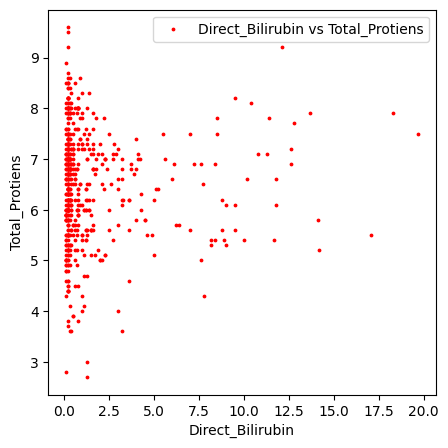

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
column_x = 'Direct_Bilirubin'
column_y = 'Total_Protiens'
data.plot.scatter(x=column_x, y=column_y, color='red',
                  marker='o', s=3, label=f'{column_x} vs {column_y}', ax=ax)

How many clusters you observed? We cannot distinguish the clusters really, but if we draw a vertical line at around X=2.5 we can hardly have two clusters on the left and right of X= 2.5.
 Does this align with number of labels in the dataset? We have two labels: Patients and healthy individuals.This is not representative of the labels because we cannot separate this two features.


**Question 4 a:**

K-means clustering is a partitioning method that categorizes data points into k clusters based on their similarity. One advantage of K-means is its simplicity and efficiency, making it computationally less expensive for large datasets. However, it relies on the user specifying the number of clusters 'k' and is sensitive to the initial placement of centroids, affecting the final results. K-means is suitable for well-separated, spherical clusters.

hierarchical clustering builds a tree-like structure of clusters, organizing data points based on their similarities. An advantage of hierarchical clustering is that it does not require specifying the number of clusters beforehand, and the dendrogram provides insights into the data's hierarchical structure. However, it can be computationally intensive for large datasets. Hierarchical clustering is useful when the data has a nested or hierarchical organization.

Both methods have applications in various domains. K-means is often employed in customer segmentation, image compression, and document clustering. Hierarchical clustering finds use in biology for gene expression analysis, taxonomy, and organizing textual data. Choosing between them depends on the nature of the data, the desired output, and computational considerations.

**Question 4 b**

In [ ]:
# k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['k-means clu'] = kmeans.fit_predict(data)

# hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
data['hierarchical clu'] = agg_clustering.fit_predict(data)

# adding the gt labels to the dataframe
new_data = data.copy()
reload_data = pd.read_csv(filepath_or_buffer=file_path)
reload_data = reload_data.fillna(0)
reload_data.loc[reload_data['Dataset'] == 2, 'Dataset'] = 0
new_data['gt labels'] = reload_data['Dataset']

# compute accuracy
kmeans_acc = accuracy_score(new_data['gt labels'], new_data['k-means clu'])
hier_acc = accuracy_score(new_data['gt labels'], new_data['hierarchical clu'])
print(f'k-means accuracy value: {kmeans_acc} \n hierarchical accuracy value: {hier_acc}')

# compute Adjusted Rand Index (ARI)
kmeans_ari = adjusted_rand_score(new_data['gt labels'], new_data['k-means clu'])
hier_ari = adjusted_rand_score(new_data['gt labels'], new_data['hierarchical clu'])
print(f'k-means ari value: {kmeans_ari} \n hierarchical ari value: {hier_ari}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-means accuracy value: 0.3053173241852487 
 hierarchical accuracy value: 0.28987993138936535
k-means ari value: -0.020946915909568455 
 hierarchical ari value: -0.004070839846256955


4.b explaining the usage of accuracy score and ARI:
It is not recommended in unsupervised learning to use accracy because it is not distinguish between 0 and 1 and it is not clear if the accuracy is 30% or 70%. The ARI is the recommended method particularly in clustering by measuring the similarity between two clusterings. ARI produces a score between -1 to 1. score = 1 in ARI defines the perfect similarity, zero indicates random clustering and negative values indicates no similarity. Applying ARI on the liver_patient data with K-mean clustering method resulted in 0.28 score which is close to 0 and is an indication of random clustering while with hierarchial clustering methid, ARI results in negative value of -0.004 which indicates no similarity between features used in this exercise.

**Question 4 c**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

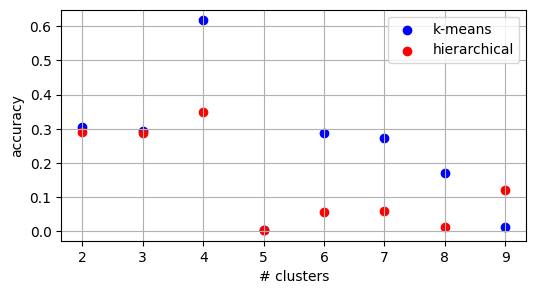

In [ ]:
# k-means clustering
kmeans_accs = []
hier_accs = []
for n_clusters in range(2, 10):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  data['k-means clu'] = kmeans.fit_predict(data)

  # hierarchical clustering
  agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
  data['hierarchical clu'] = agg_clustering.fit_predict(data)

  # adding the gt labels to the dataframe
  new_data = data.copy()
  reload_data = pd.read_csv(filepath_or_buffer=file_path)
  reload_data = reload_data.fillna(0)
  reload_data.loc[reload_data['Dataset'] == 2, 'Dataset'] = 0
  new_data['gt labels'] = reload_data['Dataset']

  # compute accuracy
  kmeans_acc = accuracy_score(new_data['gt labels'], new_data['k-means clu'])
  hier_acc = accuracy_score(new_data['gt labels'], new_data['hierarchical clu'])
  kmeans_accs.append(kmeans_acc)
  hier_accs.append(hier_acc)

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(range(2, 10), kmeans_accs, color='blue', label='k-means')
ax.scatter(range(2, 10), hier_accs, color='red', label='hierarchical')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('# clusters')
ax.grid()

**Question 4 d**

Which number is the best to cluster data?  cluster # 4

Does this number match the number of labels you have?  No, we have two labels (0/1)

Do you observe any subgroup within a single label? We have two label: Healthy and Patient groups and since cluster numner 4 is the best among all then we have subgroup, which might the patient group and the healthy group each have divided into two subgroups.

**Question 5 a**

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space by identifying the directions of maximum variance. Its advantages include computational efficiency and simplicity. PCA is widely used for feature extraction, reducing the dimensionality of datasets, and enhancing model performance. However, it assumes linear relationships and may not perform optimally when dealing with non-linear data.

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction method that focuses on preserving pairwise similarities between data points in the lower-dimensional space. It is particularly effective for visualization and capturing complex structures in the data. t-SNE is valuable for exploring high-dimensional datasets and understanding local relationships, but it can be computationally expensive and sensitive to different parameter settings.

PCA is often applied in scenarios where linear relationships dominate, such as image processing and signal processing, while t-SNE is favored for visualizing complex structures in areas like genomics, natural language processing, and exploratory data analysis. Choosing between them depends on the nature of the data and the specific goals of the analysis.

**Question 5 b**

In [ ]:
data = data.iloc[:, :10] # remove the last two columns

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Apply t-SNE to reduce to 2 features
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

**Question 5 c**

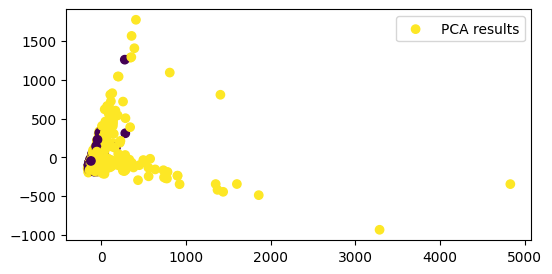

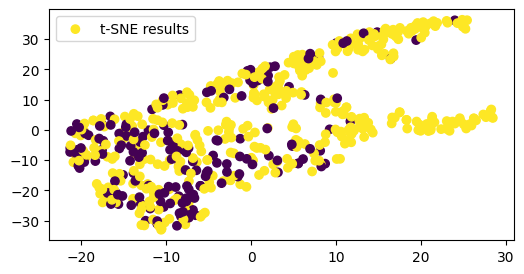

In [ ]:
### pca results
fig, ax = plt.subplots(1,1, figsize=(6,3))
gt_labels = new_data['gt labels']
ax.scatter(pca_result[:, 0], pca_result[:, 1], c=gt_labels, cmap='viridis', label='PCA results')
ax.legend()

### t-SNE
fig, ax = plt.subplots(1,1, figsize=(6,3))
gt_labels = new_data['gt labels']
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=gt_labels, cmap='viridis', label='t-SNE results')
ax.legend()

**Question 5 d**

Comparing outputs of both methods: PCA is a better model and resonantes better with our database.  In the database under the study  